In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define parameters
rate = 1
mean_service = 1
sd = 0.2

In [3]:
# Generate arrival time with exponential distribution
arrival_time = np.random.exponential(scale=1/rate, size=400).cumsum()
print(f'Arrival time: {arrival_time[:10]}')

# Generate arrival time with normal distribution
service_time = np.random.normal(loc=mean_service, scale=sd, size=400)
print(f'Service time: {service_time[:10]}')

Arrival time: [2.71571712 3.08733655 3.47112422 4.3909862  4.54499439 5.56523402
 6.10062481 6.37183004 6.49521533 6.90701088]
Service time: [0.9316119  1.27150502 0.90907894 1.04813593 0.93192148 1.19792492
 0.72061695 1.05217245 0.62960576 1.1594749 ]


In [4]:
# Define function to calculate mean waiting time
def waiting_mean(arrival_time, service_time):
    waiting_time = []
    leaving_time = []

    waiting_time.append(0)
    leaving_time.append(arrival_time[0] + service_time[0] + waiting_time[0])

    for i in range(1, len(arrival_time)):
        waiting_time.append(max(0, leaving_time[i-1] - arrival_time[i]))
        leaving_time.append(arrival_time[i] + service_time[i] + waiting_time[i])

    mean_waiting = np.mean(waiting_time)
    return mean_waiting

# Run the function
waiting_mean(arrival_time, service_time)

np.float64(30.302214304612427)

Mean: 8.773520574924188
Median: 10.195662623091799


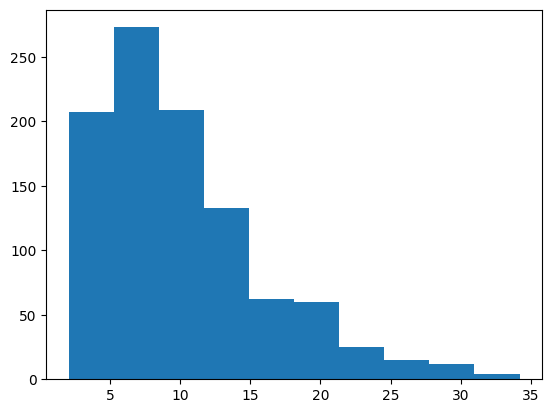

In [5]:
# Run the simulation 1000 times
average_sim = []
for i in range(1000):
    arrival_time = np.random.exponential(scale = 1/rate, size = 400).cumsum()
    service_time = np.random.normal(loc = mean_service, scale = sd, size = 400)
    waiting_time = waiting_mean(arrival_time, service_time)
    average_sim.append(waiting_time)

# Plot the histogram of the average waiting time
plt.hist(average_sim)

# Mean and median of the average waiting time
print(f'Mean: {np.median(average_sim)}')
print(f'Median: {np.mean(average_sim)}')